In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def Q_func(f):
    R = 10e-3
    L = 3e-6
    return 2*np.pi*f*L/R

def bode_basic_RLC(f1,f2):
    Q = Q_func(f1)
    # print(Q)
    return (1 + Q*(f2/f1-f1/f2)**2)**(-10)

def Crosstalk(f1,f2,p1,p2):
    '''
    2对1的串扰电压大小。
    '''
    p1 = np.array(p1)
    p2 = np.array(p2)
    # print(f1,f2,p1,p2)
    M = (np.linalg.norm(p1-p2)**(-4))
    I = bode_basic_RLC(f1,f2)
    return I*f2*M

def fitness(individual):
    Ucs = []
    for i,f1 in enumerate(individual):
        Uc = 0
        for j,f2 in enumerate(individual):
            if f2 != f1:
                Uc += Crosstalk(f1,f2,Position[i],Position[j])
        Ucs.append(Uc)
    return sum(Ucs)/len(Ucs)

In [4]:
#统计每个cell收到的串扰
Arangement = np.array([
    1e6, 2e6, 3.1e6, 4.1e6, 5e6,
    1.8e6, 4.2e6, 2.5e6, 1.7e6, 3.2e6,
    3.3e6, 2.2e6, 4.3e6, 2.9e6, 4.8e6,
    4.9e6, 3.9e6, 1.2e6, 1.9e6, 3.4e6,
    1.3e6, 2.1e6, 4.7e6, 3.5e6, 1.6e6,
    3.6e6, 4.4e6, 1.5e6, 2.3e6, 2.8e6,
    4.0e6, 2.7e6, 3.7e6, 1.4e6, 4.5e6,
    4.6e6, 2.4e6, 3.0e6, 2.6e6, 3.8e6
])
# Arangement = np.array([
#     1e6, 1.2e6, 1.3e6, 1.4e6, 1.5e6,
#     1.6e6, 1.7e6, 1.8e6, 1.9e6, 2.0e6,
#     2.1e6, 2.2e6, 2.3e6, 2.4e6, 2.5e6,
#     2.6e6, 2.7e6, 2.8e6, 2.9e6, 3.0e6,
#     3.1e6, 3.2e6, 3.3e6, 3.4e6, 3.5e6,
#     3.6e6, 3.7e6, 3.8e6, 3.9e6, 4.0e6,
#     4.1e6, 4.2e6, 4.3e6, 4.4e6, 4.5e6,
#     4.6e6, 4.7e6, 4.8e6, 4.9e6, 5.0e6
# ])
Position = np.array([
    (1,1),(1,2),(1,3),(1,4),(1,5),
    (3,1),(3,2),(3,3),(3,4),(3,5),
    (5,1),(5,2),(5,3),(5,4),(5,5),
    (7,1),(7,2),(7,3),(7,4),(7,5),
    (9,1),(9,2),(9,3),(9,4),(9,5),
    (11,1),(11,2),(11,3),(11,4),(11,5),
    (13,1),(13,2),(13,3),(13,4),(13,5),
    (15,1),(15,2),(15,3),(15,4),(15,5)
])

Ucs = []
for i,f1 in enumerate(Arangement):
    Uc = 0
    for j,f2 in enumerate(Arangement):
        if f2 != f1:
            Uc += Crosstalk(f1,f2,Position[i],Position[j])
    Ucs.append(Uc)

print(np.array(Ucs).mean(),np.array(Ucs).std())
np.array(Ucs).reshape(8,5)

4.135942465715378e-09 8.553151142897908e-09


array([[6.60135389e-22, 2.03797317e-13, 6.24679923e-10, 1.09810210e-08,
        1.29622468e-09],
       [8.08660039e-13, 4.44219222e-08, 2.97438506e-13, 1.06445606e-12,
        5.84153406e-10],
       [2.89601921e-10, 2.48076765e-12, 2.89010735e-08, 9.03892703e-12,
        1.44418630e-08],
       [8.67032276e-09, 3.53286305e-10, 3.91297789e-14, 3.00683180e-13,
        4.26184728e-09],
       [2.53926602e-14, 2.93265878e-12, 8.20615028e-09, 3.85711776e-09,
        2.18457831e-13],
       [3.50469279e-09, 9.19778551e-09, 5.95782232e-13, 5.12208303e-12,
        4.91039362e-11],
       [2.58794721e-10, 1.25791484e-10, 6.00178464e-09, 4.76986866e-13,
        1.12944644e-08],
       [5.02910112e-09, 3.09511914e-12, 2.11987447e-12, 1.02683078e-10,
        2.95541256e-09]])

In [53]:
# -------------------------------------
# 组合遗传算法
# -------------------------------------

# initialize
N = 10 # population size
Step = 500 # iteration steps
Fitness = np.zeros([Step,N])
Population = [np.random.permutation(Arangement) for n in range(N)] # generate population
for step in range(Step):
    for i,individual in enumerate(Population):
        fitness0 = fitness(individual)
        Fitness[step,i] = fitness0
        locus = np.random.choice(len(individual),2) # select two locus
        individual[[locus[0],locus[1]]] = individual[[locus[1],locus[0]]] # swap
        if fitness(individual) > fitness0: # if worse
            individual[[locus[0],locus[1]]] = individual[[locus[1],locus[0]]] # swap back

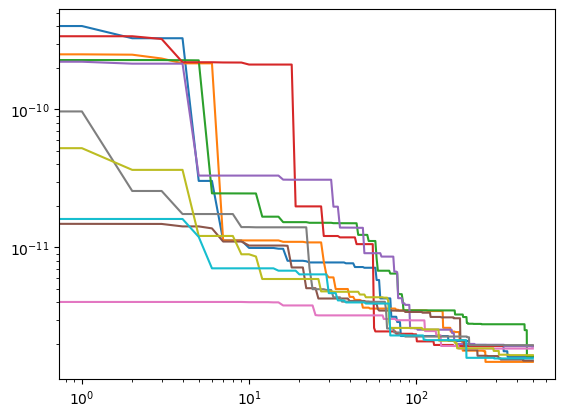

In [55]:
plt.plot(Fitness) # plt绘图默认竖着读numpy数组
plt.yscale('log')
plt.xscale('log')

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import creator, base, tools, algorithms
import multiprocessing
import sys
sys.modules['__main__'].__file__='ipython'

#统计每个cell收到的串扰
Arangement = np.array([
    1e6, 1.2e6, 1.3e6, 1.4e6, 1.5e6,
    1.6e6, 1.7e6, 1.8e6, 1.9e6, 2.0e6,
    2.1e6, 2.2e6, 2.3e6, 2.4e6, 2.5e6,
    2.6e6, 2.7e6, 2.8e6, 2.9e6, 3.0e6,
    3.1e6, 3.2e6, 3.3e6, 3.4e6, 3.5e6,
    3.6e6, 3.7e6, 3.8e6, 3.9e6, 4.0e6,
    4.1e6, 4.2e6, 4.3e6, 4.4e6, 4.5e6,
    4.6e6, 4.7e6, 4.8e6, 4.9e6, 5.0e6
])
Position = np.array([
    (1,1),(1,2),(1,3),(1,4),(1,5),
    (3,1),(3,2),(3,3),(3,4),(3,5),
    (5,1),(5,2),(5,3),(5,4),(5,5),
    (7,1),(7,2),(7,3),(7,4),(7,5),
    (9,1),(9,2),(9,3),(9,4),(9,5),
    (11,1),(11,2),(11,3),(11,4),(11,5),
    (13,1),(13,2),(13,3),(13,4),(13,5),
    (15,1),(15,2),(15,3),(15,4),(15,5)
])

# Define the fitness function
def Q_func(f):
    R = 10e-3
    L = 3e-6
    return 2*np.pi*f*L/R

def bode_basic_RLC(f1,f2):
    Q = Q_func(f1)
    # print(Q)
    return (1 + Q*(f2/f1-f1/f2)**2)**(-10)

def Crosstalk(f1,f2,p1,p2):
    '''
    2对1的串扰电压大小。
    '''
    p1 = np.array(p1)
    p2 = np.array(p2)
    # print(f1,f2,p1,p2)
    M = (np.linalg.norm(p1-p2)**(-4))
    I = bode_basic_RLC(f1,f2)
    return I*f2*M

def fitness(individual):
    Ucs = []
    newArrange = Arangement[individual]
    for i,f1 in enumerate(newArrange):
        Uc = 0
        for j,f2 in enumerate(newArrange):
            if f2 != f1:
                Uc += Crosstalk(f1,f2,Position[i],Position[j])
        Ucs.append(Uc)
    return sum(Ucs)/len(Ucs), 

def opt(individual, k=2):
    n = len(individual)
    optimizedArrange = individual
    minUc = fitness(optimizedArrange)
    for i in range(1,n-2):
        for j in range(i+k, n):
            if j-i == 1:
                continue
            reversedArrange = individual[:i]+individual[i:j][::-1]+individual[j:]# 部分翻转后的排列
            reversedUc = fitness(reversedArrange)
            # 如果翻转后路径更优，则更新最优解
            if  reversedUc < minUc:
                minUc = reversedUc
                optimizedArrange = reversedArrange
    return optimizedArrange, minUc

# 初始化多核运行
pool = multiprocessing.Pool(processes=16)

# Define the individual and the population
ngen = 1000
npop = 40
cxpb = 0.5
mutpb = 0.2
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("map", pool.map)

toolbox.register("indices", random.sample, range(len(Arangement)), len(Arangement))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
pop = toolbox.population(n=npop)

# Define the genetic operators
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("evaluate", fitness)
toolbox.register("localOpt", opt) # 优化函数

#generate statistics recording
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register('avg', np.mean)
stats.register('min', np.min)
logbook = tools.Logbook()
logbook.header = ['gen', 'nevals'] + (stats.fields)

## 实现遗传算法
# 评价族群
invalid_ind = [ind for ind in pop if not ind.fitness.valid]
fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
for ind, fit in zip(invalid_ind, fitnesses):
    ind.fitness.values = fit
# 记录数据
record = stats.compile(pop)
logbook.record(gen=0, nevals=len(invalid_ind), **record)

for gen in range(1, ngen+1): # 方便输出数据好看
    # 配种选择
    offspring = toolbox.select(pop, 2*npop)
    offspring = [toolbox.clone(_) for _ in offspring] #一定要复制，否则在交叉和突变这样的原位操作中，会改变所有select出来的同个体副本
    # 变异操作 - 交叉
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < cxpb:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    # 变异操作 - 突变
    for mutant in offspring:
        if random.random() < mutpb:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    # 评价当前没有fitness的个体，确保整个族群中的个体都有对应的适应度
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    # 环境选择 - 保留精英
    pop = tools.selBest(offspring, npop, fit_attr='fitness') # 选择精英,保持种群规模
#   pop[:] = offspring
    
#     # 对族群中的精英进行优化
#     nOpt = int(npop/10)
#     toBeOpt = tools.selBest(pop, nOpt)
#     for ind in toBeOpt:
#         ind[:], ind.fitness.values = toolbox.localOpt(ind)
# #       print(ind.fitness.values)
#     # 记录数据
#     record = stats.compile(pop)
#     logbook.record(gen=gen, nevals=len(invalid_ind), **record)

# # Generate the initial population
# pop = toolbox.population(n=100)
# hof = tools.HallOfFame(1)

# # Run the genetic algorithm
# result, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=1000, stats = stats, halloffame=hof, verbose=True)

pool.close()

# show logbook
# record = stats.compile(pop)
# gen = logbook.select("gen")
fit_mins = logbook.select("min")
fit_avgs = logbook.select("avg")    

plt.plot(fit_mins)
plt.plot(fit_avgs)
plt.yscale('log')
plt.xscale('log')

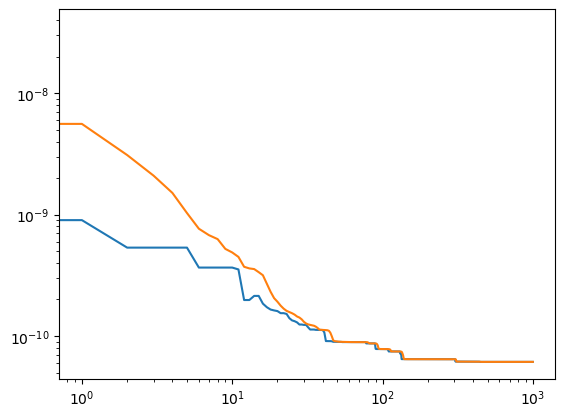

In [19]:
# show logbook
# record = stats.compile(pop)
# gen = logbook.select("gen")
fit_mins = logbook.select("min")
fit_avgs = logbook.select("avg")    

plt.plot(fit_mins)
plt.plot(fit_avgs)
plt.yscale('log')
plt.xscale('log')

In [20]:
fit_mins[-1]

6.12309148193455e-11